<a href="https://colab.research.google.com/github/noya19/Mushroom-Classsification-Common-Genuses/blob/master/MushroomMulti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This will Mount your Google drive to The colab notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#The Zip File is brought it to the local file
#For this to work you do the following:
#  1. Download the Kaggle Dataset of Mushrooms Common Genuses
#  2.Convert them to a zip file and upload to your Google Drive
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Mushrooms.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [3]:
#data is stored temoporarily( for particular Session ) in /tmp folder of Colab 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = '/tmp/Mushrooms'

In [4]:
#Adding a Pre-Trained Resnet50 model
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50

new_model = ResNet50(input_shape = (224, 224, 3), 
                                include_top = False,          #This line excludes the top Fully Connected Layers and moves dorectly to the Conv layers
                                pooling = 'avg',
                                weights = 'imagenet')

for layer in new_model.layers:
  layer.trainable = False


new_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
#Converting Model to a CNN

model = tf.keras.models.Sequential()
model.add(new_model)

In [7]:
#Adding Own DNN

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(9, activation = 'softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                

In [8]:
#COMPILING THE MODEL
model.compile( loss='categorical_crossentropy',optimizer="adam" ,metrics=['accuracy'])

In [9]:
#IMAGE GENERATION AND AUGMENTATION

from keras.applications.resnet50 import preprocess_input


data_generator = ImageDataGenerator(preprocessing_function = preprocess_input, validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True )
#train Data
train_batches= data_generator.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode = 'categorical',
    batch_size=100
    )

#Valid Data
valid_batches = data_generator.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode = 'categorical',
    batch_size=50,
    subset = 'validation'
    )


Using TensorFlow backend.


Found 6714 images belonging to 9 classes.
Found 1339 images belonging to 9 classes.


In [10]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [11]:
#TRAINING THE MODEL
history = model.fit(
    train_batches,
    validation_data = valid_batches,
    epochs = 20,
    verbose=1,
)

Epoch 1/20
68/68 [==============================] - 142s 2s/step - loss: 1.4601 - accuracy: 0.6047 - val_loss: 0.8930 - val_accuracy: 0.7020
Epoch 2/20
68/68 [==============================] - 140s 2s/step - loss: 0.7047 - accuracy: 0.7663 - val_loss: 0.5893 - val_accuracy: 0.7894
Epoch 3/20
68/68 [==============================] - 140s 2s/step - loss: 0.5762 - accuracy: 0.8012 - val_loss: 0.4642 - val_accuracy: 0.8364
Epoch 4/20
68/68 [==============================] - 140s 2s/step - loss: 0.4705 - accuracy: 0.8430 - val_loss: 0.3874 - val_accuracy: 0.8648
Epoch 5/20
68/68 [==============================] - 140s 2s/step - loss: 0.4060 - accuracy: 0.8569 - val_loss: 0.2920 - val_accuracy: 0.8932
Epoch 6/20
68/68 [==============================] - 140s 2s/step - loss: 0.3317 - accuracy: 0.8791 - val_loss: 0.2448 - val_accuracy: 0.9104
Epoch 7/20
68/68 [==============================] - 139s 2s/step - loss: 0.3372 - accuracy: 0.8783 - val_loss: 0.2262 - val_accuracy: 0.9216
Epoch 8/20
68

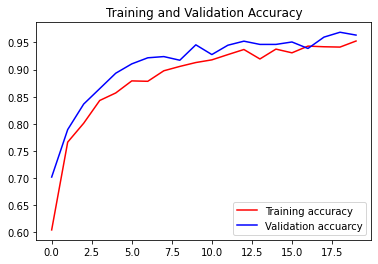

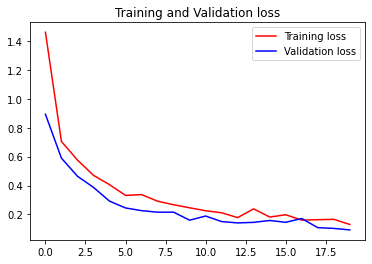

In [13]:
#PLOTING THE ACCURACY AND LOSS
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = "Training accuracy")


plt.plot(epochs, val_acc, 'b', label = "Validation accuarcy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()


In [14]:
new_model.trainable = True

In [15]:
#Fine tuning the Model ( To be Done only after training the custom top layers once)
#Check the  total layers in the Base_model
print("Total layers in the model:", len(new_model.layers))

Total layers in the model: 176


In [16]:
#setting the higher layers as trainable
non_trainable_till = 122
for layer in new_model.layers[0:non_trainable_till]:
      layer.trainable = False
new_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [17]:
#compile model
model.compile( loss='categorical_crossentropy',optimizer="adam" ,metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                

In [18]:
len(model.trainable_variables)
print(new_model.layers[123].name)

conv4_block5_1_conv


In [19]:
#TRAINING THE MODEL AFTER FINE TUNING
history = model.fit(
    train_batches,
    validation_data = valid_batches,
    epochs = 20,
    verbose=1,
)

Epoch 1/20
68/68 [==============================] - 144s 2s/step - loss: 0.9411 - accuracy: 0.7364 - val_loss: 16.4064 - val_accuracy: 0.4481
Epoch 2/20
68/68 [==============================] - 144s 2s/step - loss: 0.4125 - accuracy: 0.8588 - val_loss: 0.7783 - val_accuracy: 0.7745
Epoch 3/20
68/68 [==============================] - 144s 2s/step - loss: 0.3228 - accuracy: 0.8902 - val_loss: 0.4467 - val_accuracy: 0.8678
Epoch 4/20
68/68 [==============================] - 144s 2s/step - loss: 0.2018 - accuracy: 0.9267 - val_loss: 0.3146 - val_accuracy: 0.8947
Epoch 5/20
68/68 [==============================] - 144s 2s/step - loss: 0.1894 - accuracy: 0.9368 - val_loss: 0.1939 - val_accuracy: 0.9328
Epoch 6/20
68/68 [==============================] - 144s 2s/step - loss: 0.1450 - accuracy: 0.9504 - val_loss: 0.3228 - val_accuracy: 0.9246
Epoch 7/20
68/68 [==============================] - 144s 2s/step - loss: 0.2222 - accuracy: 0.9263 - val_loss: 0.1419 - val_accuracy: 0.9522
Epoch 8/20
6

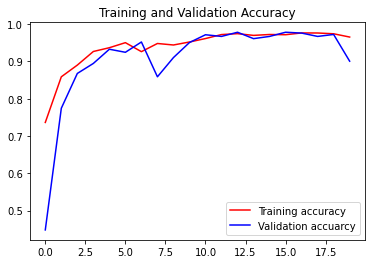

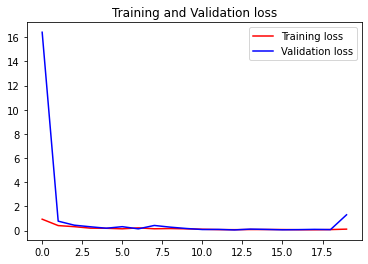

In [20]:
#PLOTING THE ACCURACY AND LOSS
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = "Training accuracy")


plt.plot(epochs, val_acc, 'b', label = "Validation accuarcy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

In [21]:
model.save("/content/drive/My Drive/model_Multi_test3_tuned.h5")

Saving amanita3.jpg to amanita3.jpg
Amanita


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


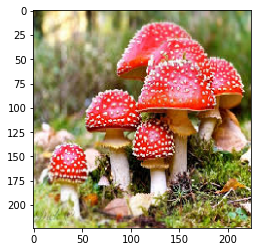

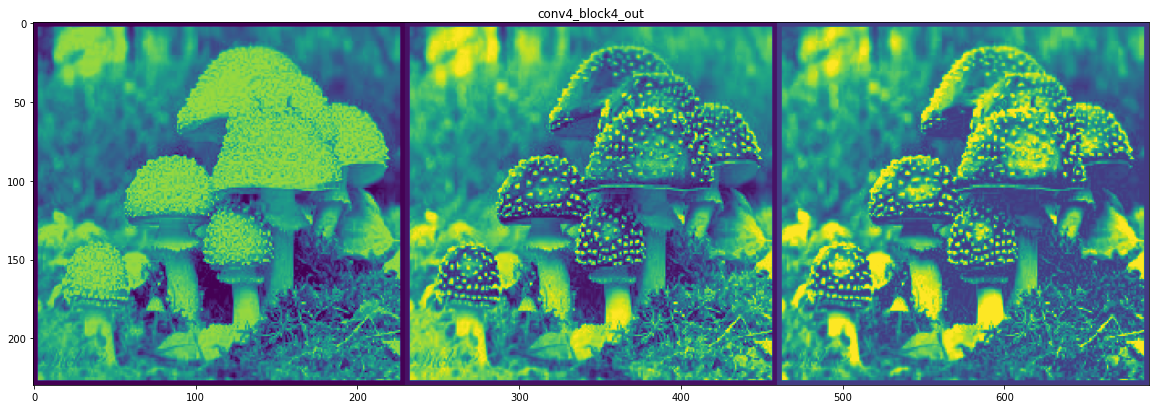

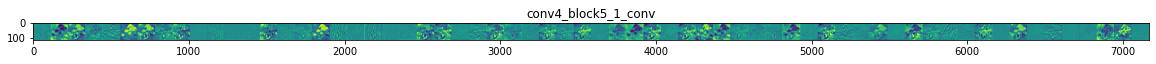

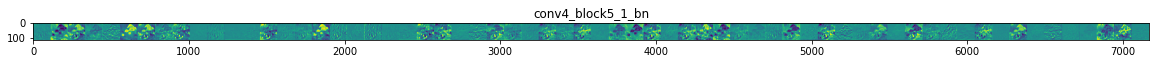

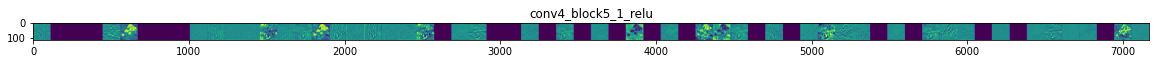

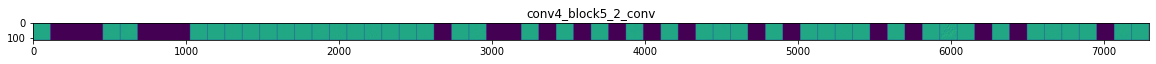

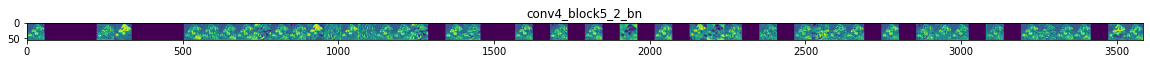

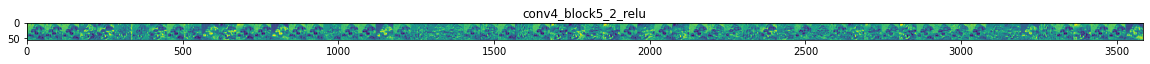

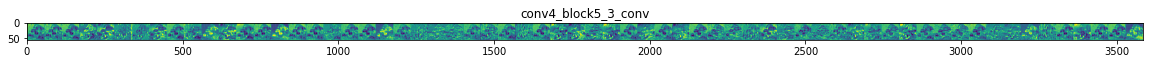

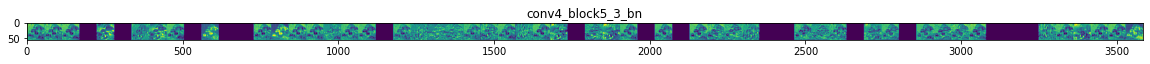

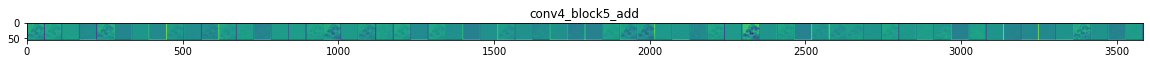

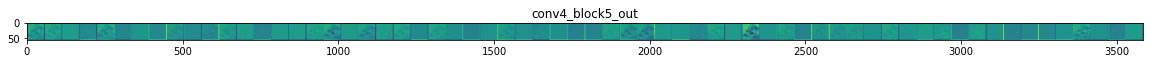

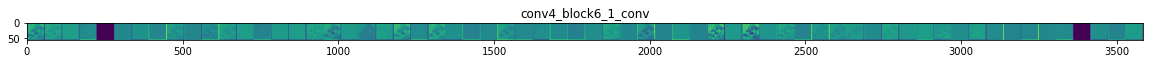

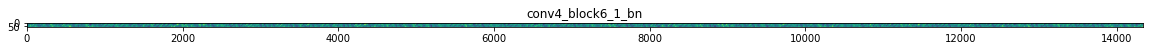

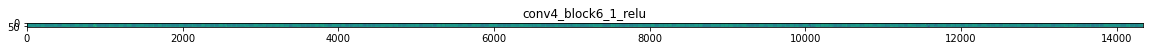

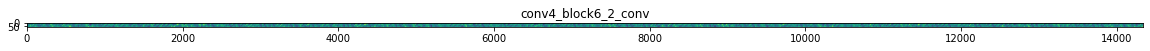

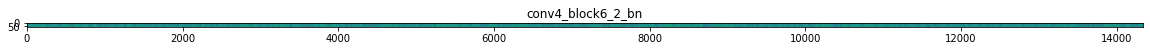

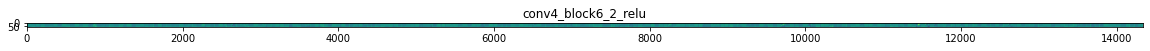

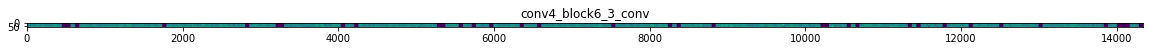

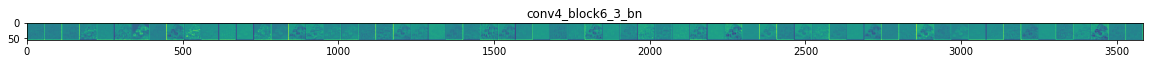

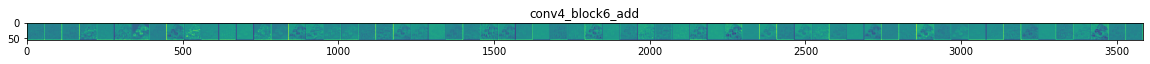

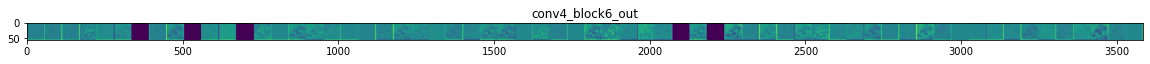

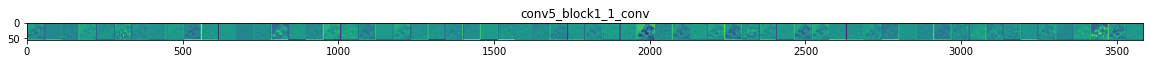

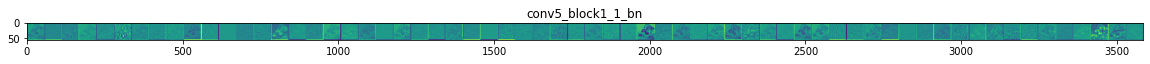

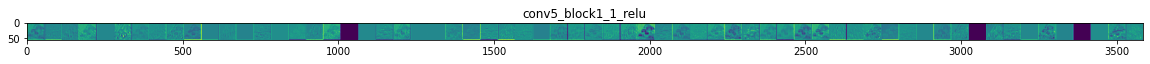

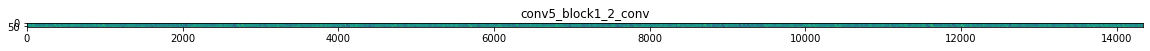

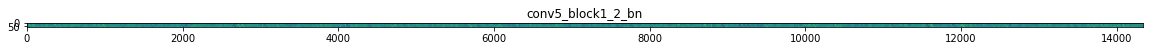

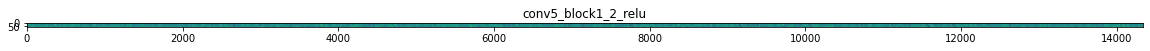

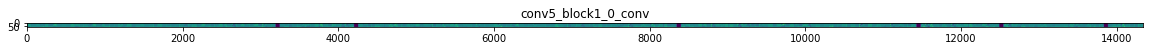

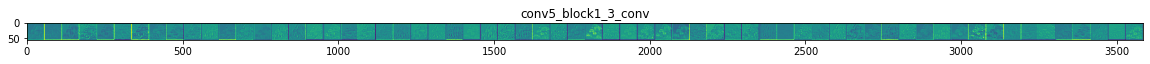

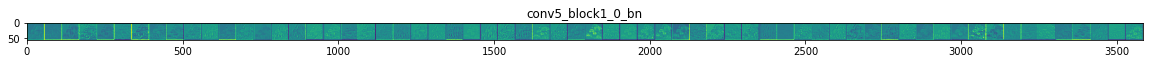

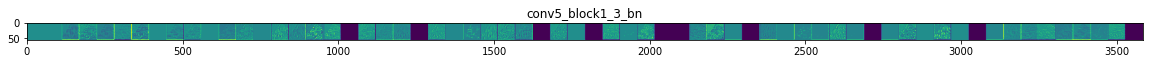

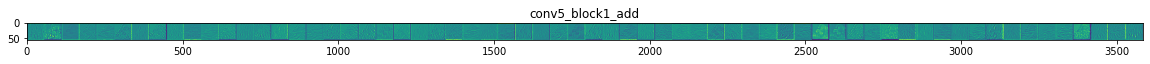

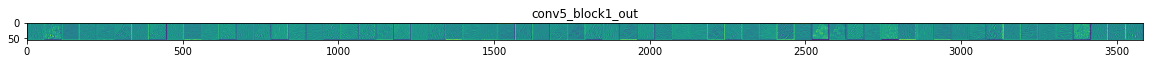

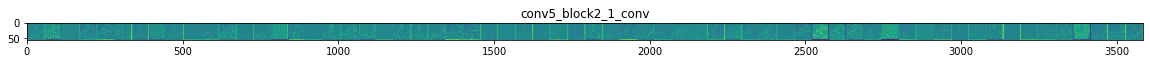

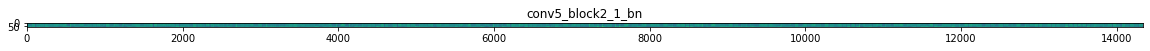

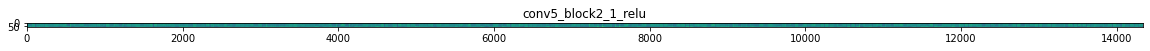

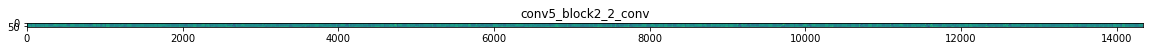

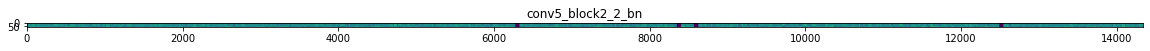

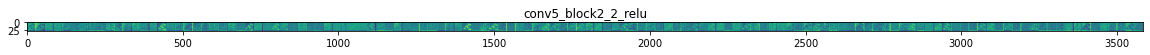

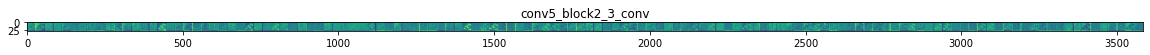

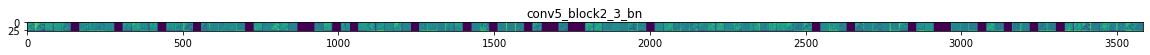

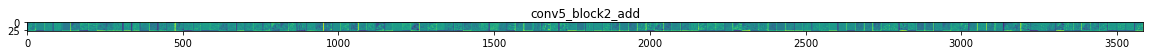

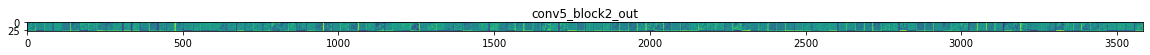

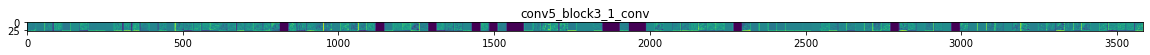

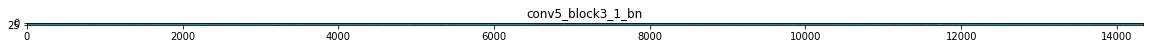

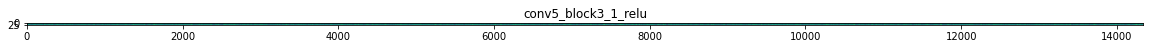

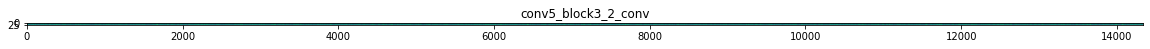

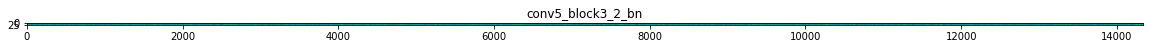

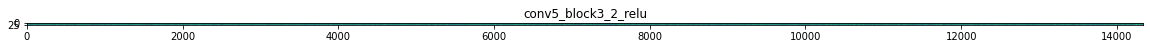

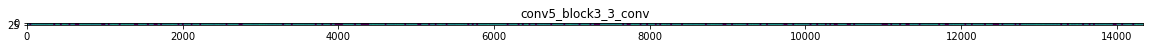

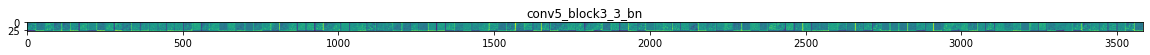

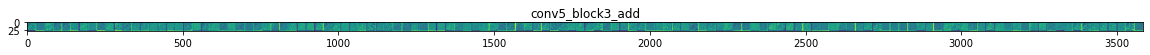

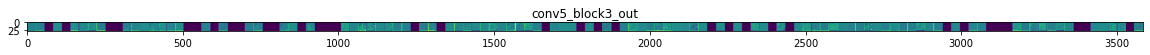

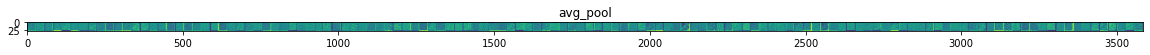

In [28]:
#PREDICTING ON IMAGES
from google.colab import files
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

genus = ["Agaricus","Amanita","Boletus","Cortinarius","Entoloma","Hygrocybe","Lactarius", "Russula", "Suillus"]
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x1 = image.img_to_array(img)
  x = np.expand_dims(x1, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)

  plt.imshow(x1/255.)
  print(genus[y_classes[0]])


  #visualizing feature maps

  successive_outputs = [layer.output for layer in new_model.layers[1:]]
  visual_model = tf.keras.models.Model(inputs = new_model.input, outputs = successive_outputs)
  x1 = x1.reshape((1,) + x1.shape)
  x1 /= 255.0

  success_feature_maps = visual_model.predict(x1)
  layer_names = [layer.name for layer in new_model.layers[122:]]
  for layer_name, feature_map in zip(layer_names, success_feature_maps):
      if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        # Postprocess the feature
        for i in range(n_features):
          x  = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std ()
          x *=  64
          x += 128
          x  = np.clip(x, 0, 255).astype('uint8')
          # Tile each filter into a horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )